---

<center><h1>Mnist Implementation from scratch<h1></center>

---

## Libraries

In [114]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Data

In [115]:
#Mnist data base: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download
data = pd.read_csv('mnist_train.csv')

In [116]:
data=np.array(data)
m, n = data.shape
np.random.shuffle(data)

#test
data_dev = data[0:1000].T
Y_dev = data_dev[0] #labels
X_dev = data_dev[1:n] #features
X_dev = X_dev / 255

#train
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

In [117]:
def plot_digit(dataset,index, fig=None, label=None, estimation=None):

    current_image = dataset[:, index, None]
    current_image = current_image.reshape((28, 28)) * 255

    #if fig!=none, print a grid of figures
    if (fig!=None):
      fig.imshow(current_image, interpolation='nearest',cmap='gray')
      fig.axis('off')

      #if is test data, print results
      if (estimation != None):
        fig.set_title(f'Prediction {estimation}, Value: {label}')
      else:
        fig.set_title(f'Imagen {index}')

    #if not, print a single number
    else:
      plt.gray()
      plt.imshow(current_image, interpolation='nearest',cmap='gray')
      plt.show()



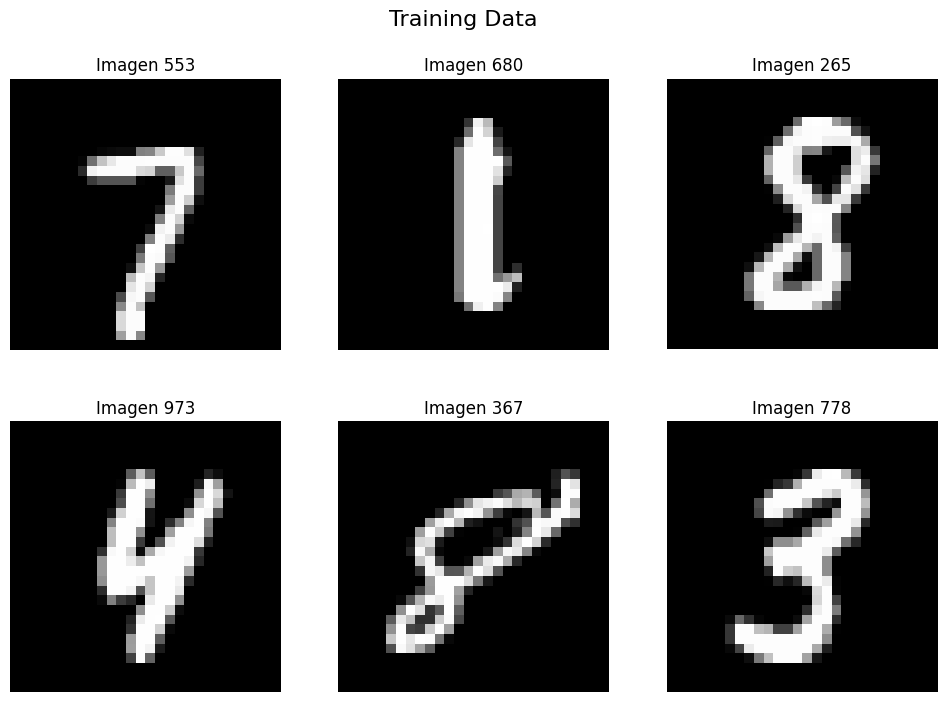

In [118]:
#Show some of the training data
grid_size=np.array([2,3])
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 7))
fig.tight_layout()

for i, ax in enumerate(axes.flat):
    plot_digit(X_train,np.random.randint(1, 1000),ax)

fig.suptitle("Training Data"+'\n',y=1.05, fontsize=16)
plt.show()

## Implementation

### Notation and Concepts

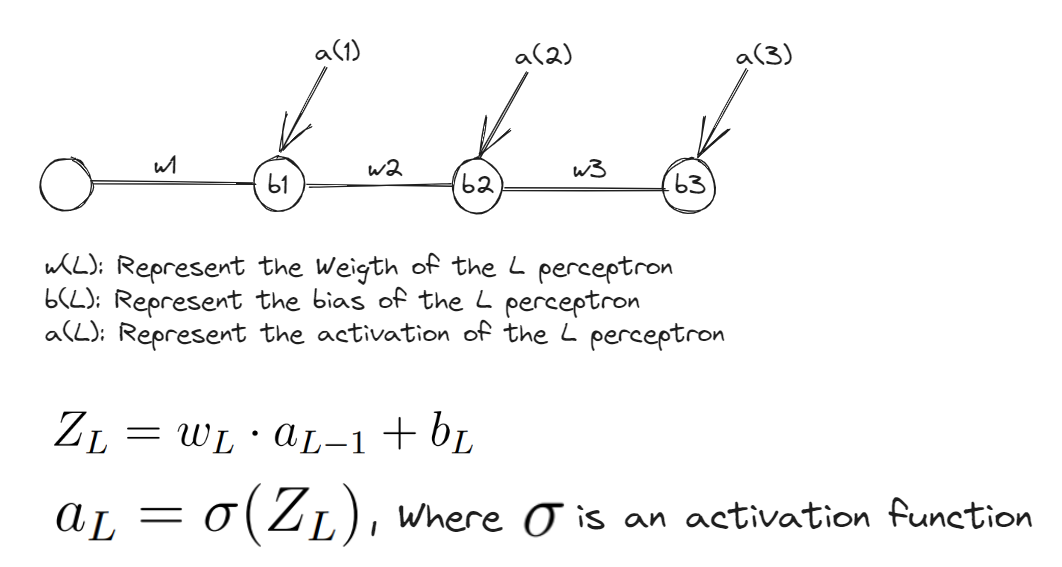

### Neuronal Network Desing



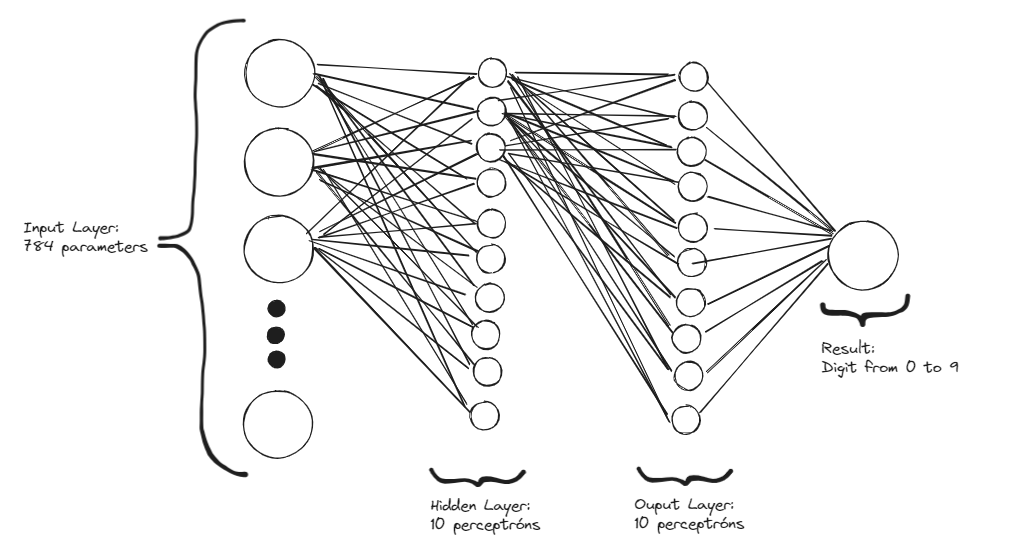

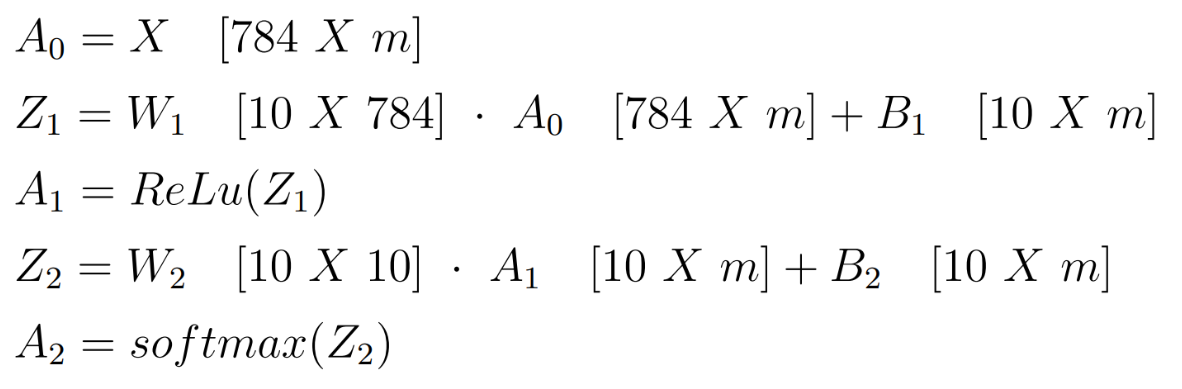

### Activation Functions

**ReLu**

ReLU (Rectified Linear Unit) is an activation function that maps any number to zero if it is negative, and otherwise maps it to itself. The ReLU function has been found to be very good for networks with many layers because it can prevent vanishing gradients when training deep networks.

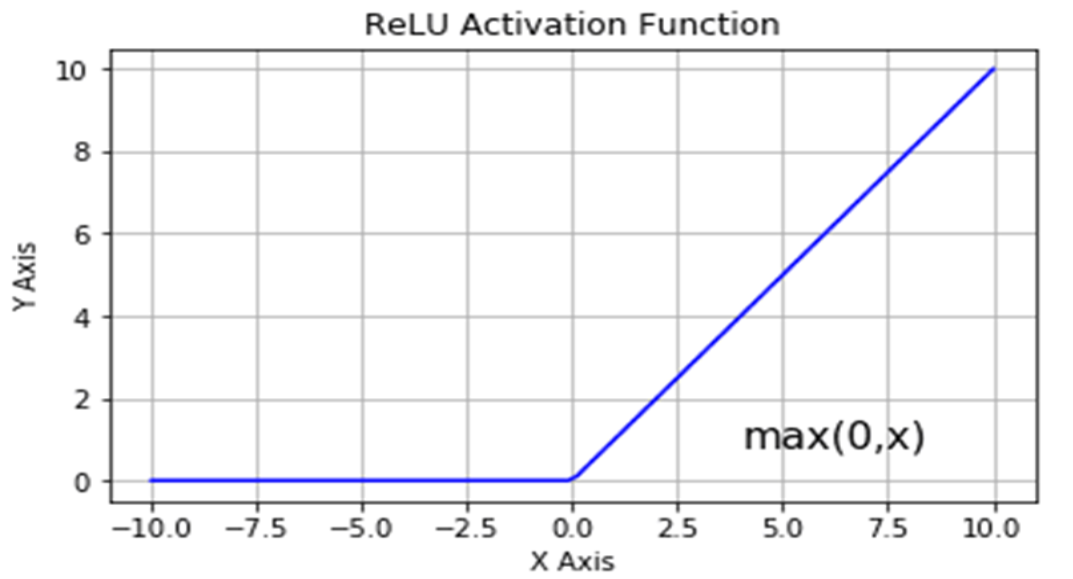

**Softmax**

Softmax is an activation function that scales numbers/logits into probabilities. The output of a Softmax is a vector (say v ) with probabilities of each possible outcome. The probabilities in vector v sums to one for all possible outcomes or classes

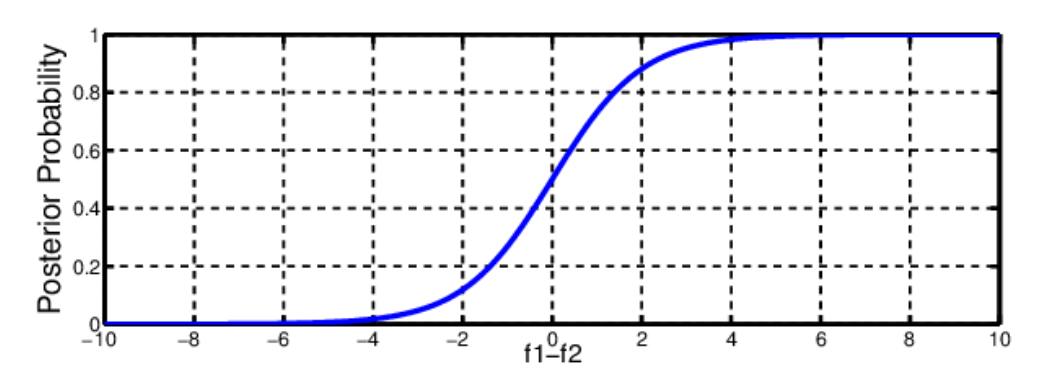



### Backpropagation

We look for the sensitivity of the cost function as a function of its parameters W, a ,b.

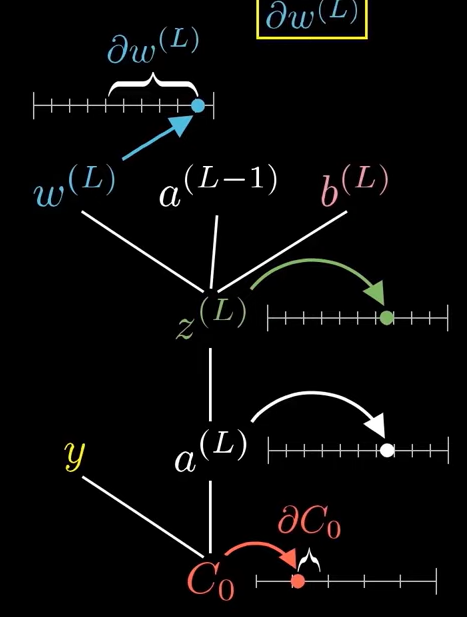

Cost function defines as following:

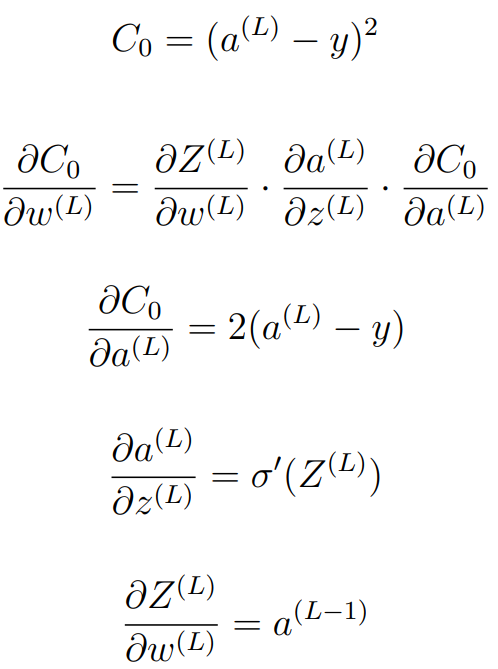

Finally:

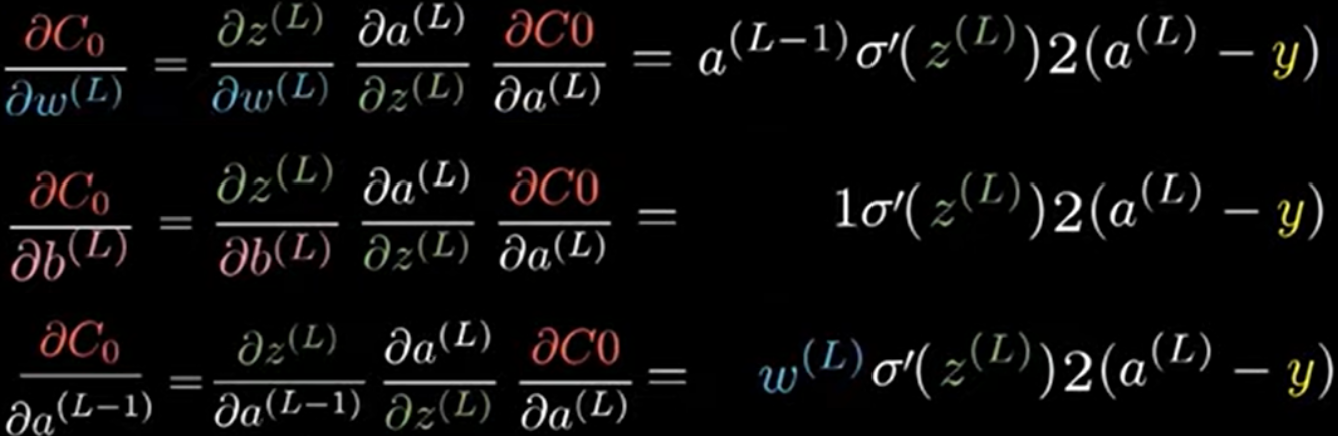

### Code

In [119]:
#activation functions
def ReLU(Z):
  return np.maximum(0,Z)

def ReLU_deriv(Z):
    return Z > 0 #1 if true, 0 if false

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

In [120]:
#Params manage
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  m, n = dW2.shape
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1,b1,W2,b2


In [121]:
#one hot encoding
def one_hot(Y):
    Y=Y.astype(int)
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [122]:
#fordward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [123]:
#backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


In [124]:
def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size
def get_predictions(A2):
  return np.argmax(A2, 0)

In [125]:
# gradiant descent
def gradient_descent(X,Y,iterations,alpha):
  W1,b1,W2,b2 = init_params()

  for i in range (iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    if (i % 10 == 0):
      print( "Iteration: ", i)
      print( "Accuracy: ", get_accuracy(get_predictions(A2),Y))

  return W1, b1, W2, b2

## Training

In [126]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 300, 0.1)

Iteration:  0
Accuracy:  0.08120338983050847
Iteration:  10
Accuracy:  0.2743728813559322
Iteration:  20
Accuracy:  0.3860338983050847
Iteration:  30
Accuracy:  0.5055254237288136
Iteration:  40
Accuracy:  0.6395762711864407
Iteration:  50
Accuracy:  0.7066610169491525
Iteration:  60
Accuracy:  0.7394745762711864
Iteration:  70
Accuracy:  0.759135593220339
Iteration:  80
Accuracy:  0.775135593220339
Iteration:  90
Accuracy:  0.7895593220338983
Iteration:  100
Accuracy:  0.8016101694915254
Iteration:  110
Accuracy:  0.8104237288135593
Iteration:  120
Accuracy:  0.8192881355932203
Iteration:  130
Accuracy:  0.8273050847457627
Iteration:  140
Accuracy:  0.8335423728813559
Iteration:  150
Accuracy:  0.839
Iteration:  160
Accuracy:  0.8443050847457627
Iteration:  170
Accuracy:  0.8481016949152542
Iteration:  180
Accuracy:  0.8516440677966102
Iteration:  190
Accuracy:  0.8558305084745763
Iteration:  200
Accuracy:  0.8588983050847457
Iteration:  210
Accuracy:  0.8615593220338983
Iteration:  2

## Testing

In [127]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

#Show some of the training data


def test_prediction(W1, b1, W2, b2):
    grid_size=np.array([2,3])
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 7))
    fig.tight_layout()

    for i, ax in enumerate(axes.flat):
        index=np.random.randint(1, 1000)
        prediction = make_predictions(X_train[:, index,None], W1, b1, W2, b2)
        label = Y_train[index]
        plot_digit(X_train,index,ax,label,prediction)


    fig.suptitle("Result Test"+'\n',y=1.05, fontsize=16)
    plt.show()

    dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
    accuracy = get_accuracy(dev_predictions, Y_dev)
    print ("")
    print("Accuracy of:", accuracy)

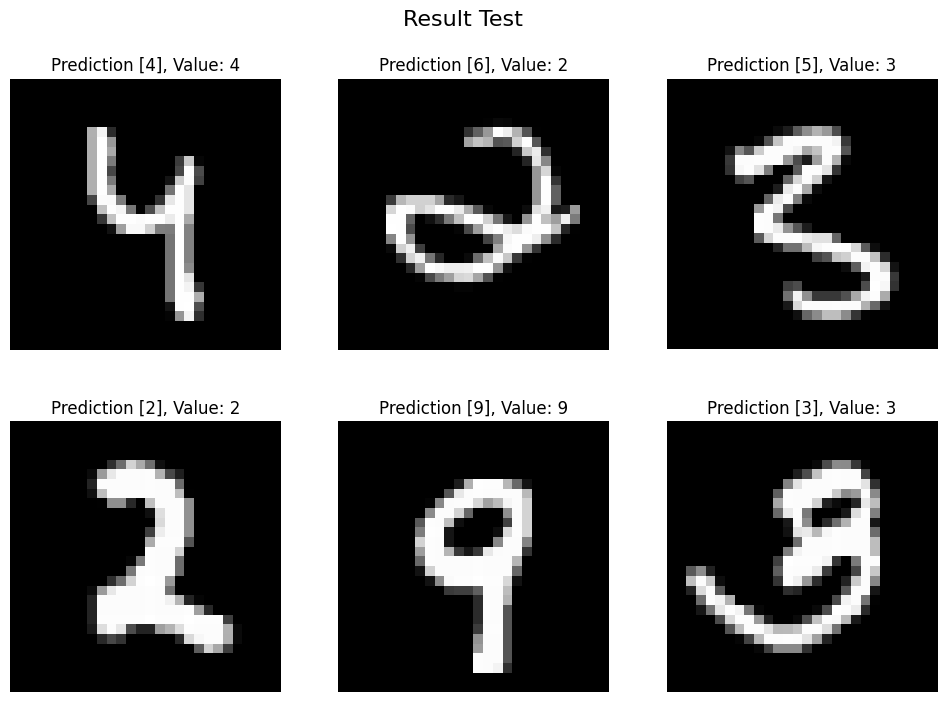


Accuracy of: 0.859


In [128]:
test_prediction(W1, b1, W2, b2)